In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.2f' % x)
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

C:\Python\Anaconda\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.8' currently installed).
  warnings.warn(msg, UserWarning)


In [2]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
from sklearn import metrics
from scipy.stats import zscore

In [3]:
df = pd.read_csv('Data.csv')

In [4]:
df.head()

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,WH_100000,EID_50000,Urban,Small,West,Zone 6,3,1,2,4651,...,1,91,29.00,NaN,13,0,A,5,15,17115
1,WH_100001,EID_50001,Rural,Large,North,Zone 5,0,0,4,6217,...,1,210,31.00,NaN,4,0,A,3,17,5074
2,WH_100002,EID_50002,Rural,Mid,South,Zone 2,1,0,4,4306,...,0,161,37.00,NaN,17,0,A,6,22,23137
3,WH_100003,EID_50003,Rural,Mid,North,Zone 3,7,4,2,6000,...,0,103,21.00,NaN,17,1,A+,3,27,22115
4,WH_100004,EID_50004,Rural,Large,North,Zone 5,3,1,2,4740,...,1,112,25.00,2009.00,18,0,C,6,24,24071


In [5]:
df1=df.drop(['Ware_house_ID', 'WH_Manager_ID','wh_est_year'],axis=1)

In [6]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
num_refill_req_l3m,25000.00,4.09,2.61,0.00,2.00,4.00,6.00,8.00
transport_issue_l1y,25000.00,0.77,1.20,0.00,0.00,0.00,1.00,5.00
Competitor_in_mkt,25000.00,3.10,1.14,0.00,2.00,3.00,4.00,12.00
retail_shop_num,25000.00,4985.71,1052.83,1821.00,4313.00,4859.00,5500.00,11008.00
distributor_num,25000.00,42.42,16.06,15.00,29.00,42.00,56.00,70.00
flood_impacted,25000.00,0.10,0.30,0.00,0.00,0.00,0.00,1.00
flood_proof,25000.00,0.05,0.23,0.00,0.00,0.00,0.00,1.00
electric_supply,25000.00,0.66,0.47,0.00,0.00,1.00,1.00,1.00
dist_from_hub,25000.00,163.54,62.72,55.00,109.00,164.00,218.00,271.00
workers_num,24010.00,28.94,7.87,10.00,24.00,28.00,33.00,98.00


In [7]:
df1.head()

,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,...,flood_proof,electric_supply,dist_from_hub,workers_num,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,Urban,Small,West,Zone 6,3,1,2,4651,Rented,24,...,1,1,91,29.00,13,0,A,5,15,17115
1,Rural,Large,North,Zone 5,0,0,4,6217,Company Owned,47,...,0,1,210,31.00,4,0,A,3,17,5074
2,Rural,Mid,South,Zone 2,1,0,4,4306,Company Owned,64,...,0,0,161,37.00,17,0,A,6,22,23137
3,Rural,Mid,North,Zone 3,7,4,2,6000,Rented,50,...,0,0,103,21.00,17,1,A+,3,27,22115
4,Rural,Large,North,Zone 5,3,1,2,4740,Company Owned,42,...,0,1,112,25.00,18,0,C,6,24,24071


In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Location_type                 25000 non-null  object 
 1   WH_capacity_size              25000 non-null  object 
 2   zone                          25000 non-null  object 
 3   WH_regional_zone              25000 non-null  object 
 4   num_refill_req_l3m            25000 non-null  int64  
 5   transport_issue_l1y           25000 non-null  int64  
 6   Competitor_in_mkt             25000 non-null  int64  
 7   retail_shop_num               25000 non-null  int64  
 8   wh_owner_type                 25000 non-null  object 
 9   distributor_num               25000 non-null  int64  
 10  flood_impacted                25000 non-null  int64  
 11  flood_proof                   25000 non-null  int64  
 12  electric_supply               25000 non-null  int64  
 13  d

## Duplicacy in the Dataset

In [9]:
df1.duplicated().sum()

0

## Null Value treatment using Imputer Methods

In [10]:
df1.isnull().sum()

Location_type                     0
WH_capacity_size                  0
zone                              0
WH_regional_zone                  0
num_refill_req_l3m                0
transport_issue_l1y               0
Competitor_in_mkt                 0
retail_shop_num                   0
wh_owner_type                     0
distributor_num                   0
flood_impacted                    0
flood_proof                       0
electric_supply                   0
dist_from_hub                     0
workers_num                     990
storage_issue_reported_l3m        0
temp_reg_mach                     0
approved_wh_govt_certificate    908
wh_breakdown_l3m                  0
govt_check_l3m                    0
product_wg_ton                    0
dtype: int64

In [11]:
cols=df1.columns

In [12]:
objects=df1[cols].select_dtypes(include=['object','category']).columns
non_objects=df1[cols].select_dtypes(exclude=['object','category']).columns

In [13]:
#you can use any other method as well
from sklearn.impute import KNNImputer
imputer = KNNImputer(missing_values = np.nan, n_neighbors=5)
imputer= imputer.fit(df1[non_objects].iloc[:,:])

In [14]:
df1[non_objects]=imputer.transform(df1[non_objects])

In [15]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent',verbose=0)
imputer= imputer.fit(df1[objects].iloc[:,:])

In [16]:
df1[objects]=imputer.transform(df1[objects])

In [17]:
df1.isnull().sum()

Location_type                   0
WH_capacity_size                0
zone                            0
WH_regional_zone                0
num_refill_req_l3m              0
transport_issue_l1y             0
Competitor_in_mkt               0
retail_shop_num                 0
wh_owner_type                   0
distributor_num                 0
flood_impacted                  0
flood_proof                     0
electric_supply                 0
dist_from_hub                   0
workers_num                     0
storage_issue_reported_l3m      0
temp_reg_mach                   0
approved_wh_govt_certificate    0
wh_breakdown_l3m                0
govt_check_l3m                  0
product_wg_ton                  0
dtype: int64

In [18]:
new_list=[]
new_list_obj =[]

In [19]:
for i in cols:
    if df1[i].dtype != 'object':
        new_list.append(i)

In [20]:
for i in cols:
    if df1[i].dtype == 'object':
        new_list_obj.append(i)

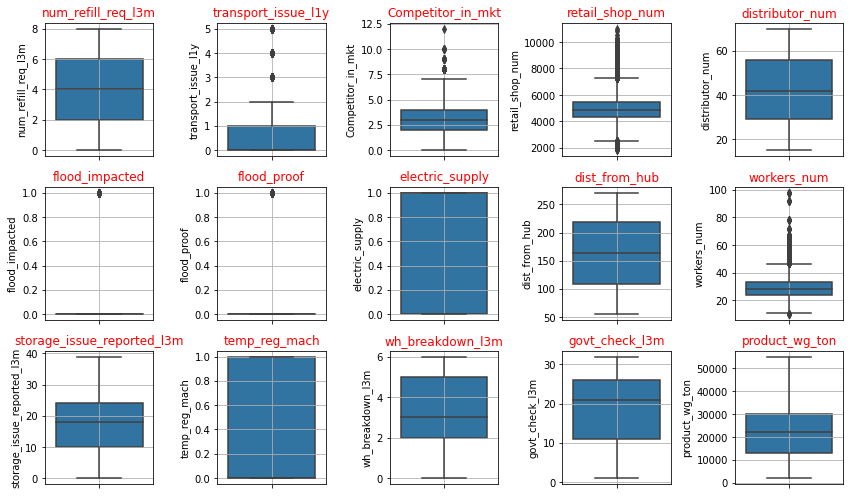

In [21]:
data_plot=df1[new_list]
fig=plt.figure(figsize=(12,7))
for i in range(0,len(data_plot.columns)):
    ax=fig.add_subplot(3,5,i+1)
    sns.boxplot(y=data_plot[data_plot.columns[i]])
    ax.set_title(data_plot.columns[i],color='Red')
    plt.grid()
plt.tight_layout()
plt.show()

In [22]:
new_list

['num_refill_req_l3m',
 'transport_issue_l1y',
 'Competitor_in_mkt',
 'retail_shop_num',
 'distributor_num',
 'flood_impacted',
 'flood_proof',
 'electric_supply',
 'dist_from_hub',
 'workers_num',
 'storage_issue_reported_l3m',
 'temp_reg_mach',
 'wh_breakdown_l3m',
 'govt_check_l3m',
 'product_wg_ton']

In [23]:
d=[]
e=[]
f=[]
g=[]

In [24]:
len(df1)

25000

In [25]:
for i in range(0,len(df1)):
    if df1['transport_issue_l1y'][i]>2:
        d.append(i)
for i in range(1,len(df1)):
    if df1['Competitor_in_mkt'][i]>7:
        e.append(i)
for i in range(1,len(df1)):
    if df1['retail_shop_num'][i]>7000:
        f.append(i)
for i in range(1,len(df1)):
    if df1['workers_num'][i]>50:
        g.append(i)

In [26]:
print("Outlier value in transport_issue_l1y : ",len(d))
print("Outlier value in Competitor_in_mkt : ",len(e))
print("Outlier value in retail_shop_num : ",len(f))
print("Outlier value in workers_num : ",len(g))

Outlier value in transport_issue_l1y :  2943
Outlier value in Competitor_in_mkt :  96
Outlier value in retail_shop_num :  1174
Outlier value in workers_num :  346


In [27]:
columlist=['Competitor_in_mkt','retail_shop_num','workers_num']

In [28]:
#Define a function which returns the Upper and Lower limit to detect outliers for each feature
def remove_outlier(columlist):
    Q1,Q3=columlist.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range 

In [29]:
for i in columlist: 
    if df1[i].dtype != 'object':
        LL, UL = remove_outlier(df1[i])
        df1[i] = np.where(df1[i] > UL, UL, df1[i])
        df1[i] = np.where(df1[i] < LL, LL, df1[i])

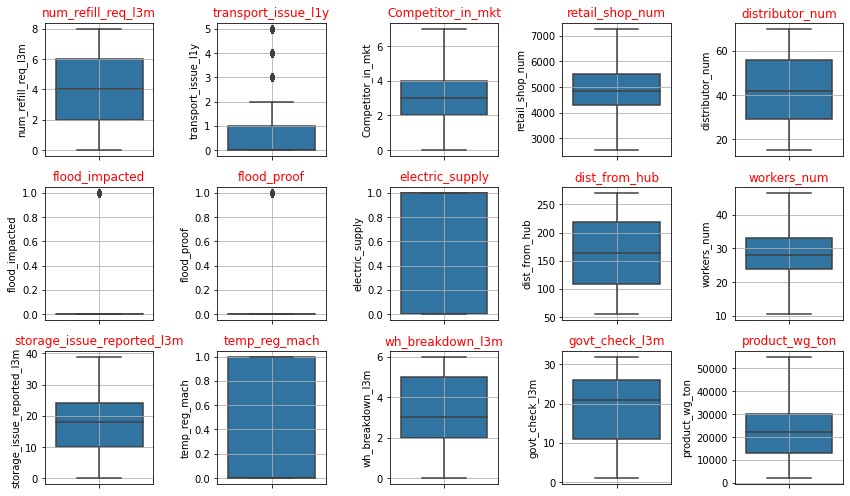

In [30]:
data_plot=df1[new_list]
fig=plt.figure(figsize=(12,7))
for i in range(0,len(data_plot.columns)):
    ax=fig.add_subplot(3,5,i+1)
    sns.boxplot(y=data_plot[data_plot.columns[i]])
    ax.set_title(data_plot.columns[i],color='Red')
    plt.grid()
plt.tight_layout()
plt.show()

In [31]:
new_list_obj

['Location_type',
 'WH_capacity_size',
 'zone',
 'WH_regional_zone',
 'wh_owner_type',
 'approved_wh_govt_certificate']

In [32]:
for column in df1[['Location_type','WH_capacity_size','zone','WH_regional_zone','wh_owner_type','approved_wh_govt_certificate']]:
    print(column.upper(),':',df1[column].nunique())
    print(df1[column].value_counts())
    print('\n*************************************************\n')

LOCATION_TYPE : 2
Rural    22957
Urban     2043
Name: Location_type, dtype: int64

*************************************************

WH_CAPACITY_SIZE : 3
Large    10169
Mid      10020
Small     4811
Name: WH_capacity_size, dtype: int64

*************************************************

ZONE : 4
North    10278
West      7931
South     6362
East       429
Name: zone, dtype: int64

*************************************************

WH_REGIONAL_ZONE : 6
Zone 6    8339
Zone 5    4587
Zone 4    4176
Zone 2    2963
Zone 3    2881
Zone 1    2054
Name: WH_regional_zone, dtype: int64

*************************************************

WH_OWNER_TYPE : 2
Company Owned    13578
Rented           11422
Name: wh_owner_type, dtype: int64

*************************************************

APPROVED_WH_GOVT_CERTIFICATE : 5
C     6409
B+    4917
B     4812
A     4671
A+    4191
Name: approved_wh_govt_certificate, dtype: int64

*************************************************



In [33]:
df1.shape

(25000, 21)

In [34]:
def uni_var_analysis(column,nbins):
    print('Description of '+ column)
    print('---------------------------------------------------------')
    print(df1[column].describe(),end=' ')
    print('')
    print('')
       
    #print('---------------------------------------------------------')
    #print('Histogram of ' + column)
    #sns.histplot(df1[column]);
    #plt.show()
    
    print('---------------------------------------------------------')
    print('Distplot of ' + column)
    sns.distplot(df1[column]);
    plt.show()

In [35]:
categ=[]
numeric=[]
for i in df1.columns:
    if df1[i].dtype=="object":
        categ.append(i)
    else:
        numeric.append(i)
print(categ) 
print(numeric)

['Location_type', 'WH_capacity_size', 'zone', 'WH_regional_zone', 'wh_owner_type', 'approved_wh_govt_certificate']
['num_refill_req_l3m', 'transport_issue_l1y', 'Competitor_in_mkt', 'retail_shop_num', 'distributor_num', 'flood_impacted', 'flood_proof', 'electric_supply', 'dist_from_hub', 'workers_num', 'storage_issue_reported_l3m', 'temp_reg_mach', 'wh_breakdown_l3m', 'govt_check_l3m', 'product_wg_ton']


Description of num_refill_req_l3m
---------------------------------------------------------
count   25000.00
mean        4.09
std         2.61
min         0.00
25%         2.00
50%         4.00
75%         6.00
max         8.00
Name: num_refill_req_l3m, dtype: float64 

---------------------------------------------------------
Distplot of num_refill_req_l3m


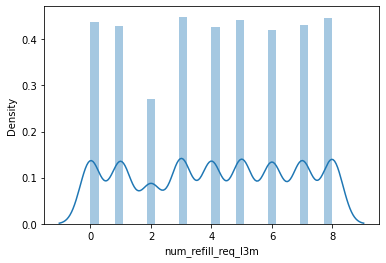

Description of transport_issue_l1y
---------------------------------------------------------
count   25000.00
mean        0.77
std         1.20
min         0.00
25%         0.00
50%         0.00
75%         1.00
max         5.00
Name: transport_issue_l1y, dtype: float64 

---------------------------------------------------------
Distplot of transport_issue_l1y


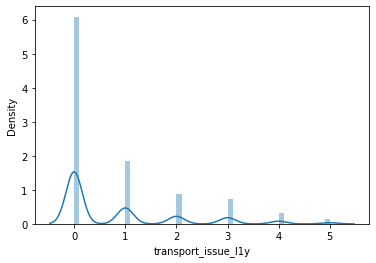

Description of Competitor_in_mkt
---------------------------------------------------------
count   25000.00
mean        3.10
std         1.12
min         0.00
25%         2.00
50%         3.00
75%         4.00
max         7.00
Name: Competitor_in_mkt, dtype: float64 

---------------------------------------------------------
Distplot of Competitor_in_mkt


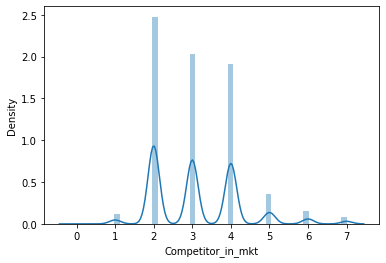

Description of retail_shop_num
---------------------------------------------------------
count   25000.00
mean     4958.89
std       969.40
min      2532.50
25%      4313.00
50%      4859.00
75%      5500.00
max      7280.50
Name: retail_shop_num, dtype: float64 

---------------------------------------------------------
Distplot of retail_shop_num


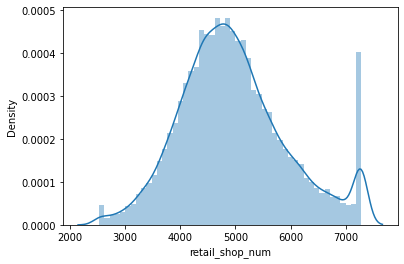

Description of distributor_num
---------------------------------------------------------
count   25000.00
mean       42.42
std        16.06
min        15.00
25%        29.00
50%        42.00
75%        56.00
max        70.00
Name: distributor_num, dtype: float64 

---------------------------------------------------------
Distplot of distributor_num


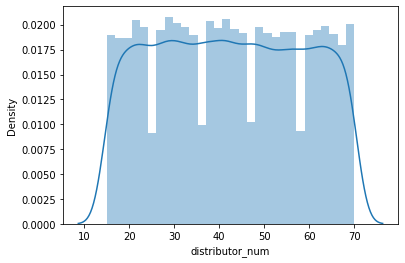

Description of flood_impacted
---------------------------------------------------------
count   25000.00
mean        0.10
std         0.30
min         0.00
25%         0.00
50%         0.00
75%         0.00
max         1.00
Name: flood_impacted, dtype: float64 

---------------------------------------------------------
Distplot of flood_impacted


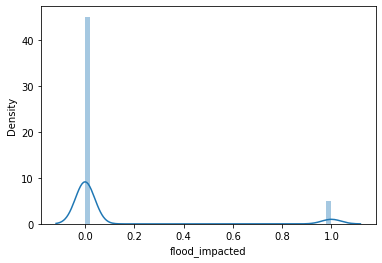

Description of flood_proof
---------------------------------------------------------
count   25000.00
mean        0.05
std         0.23
min         0.00
25%         0.00
50%         0.00
75%         0.00
max         1.00
Name: flood_proof, dtype: float64 

---------------------------------------------------------
Distplot of flood_proof


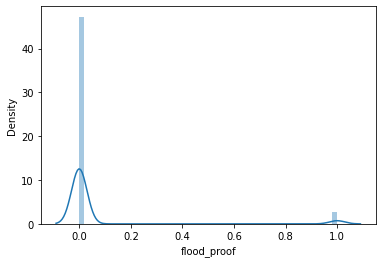

Description of electric_supply
---------------------------------------------------------
count   25000.00
mean        0.66
std         0.47
min         0.00
25%         0.00
50%         1.00
75%         1.00
max         1.00
Name: electric_supply, dtype: float64 

---------------------------------------------------------
Distplot of electric_supply


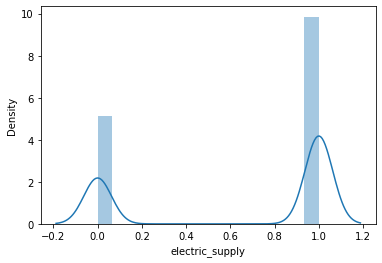

Description of dist_from_hub
---------------------------------------------------------
count   25000.00
mean      163.54
std        62.72
min        55.00
25%       109.00
50%       164.00
75%       218.00
max       271.00
Name: dist_from_hub, dtype: float64 

---------------------------------------------------------
Distplot of dist_from_hub


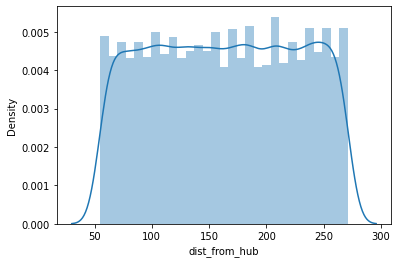

Description of workers_num
---------------------------------------------------------
count   25000.00
mean       28.78
std         7.17
min        10.50
25%        24.00
50%        28.00
75%        33.00
max        46.50
Name: workers_num, dtype: float64 

---------------------------------------------------------
Distplot of workers_num


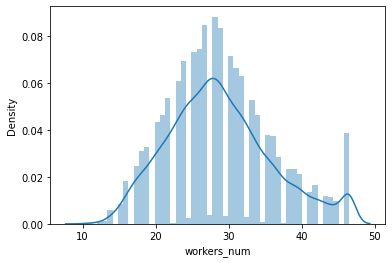

Description of storage_issue_reported_l3m
---------------------------------------------------------
count   25000.00
mean       17.13
std         9.16
min         0.00
25%        10.00
50%        18.00
75%        24.00
max        39.00
Name: storage_issue_reported_l3m, dtype: float64 

---------------------------------------------------------
Distplot of storage_issue_reported_l3m


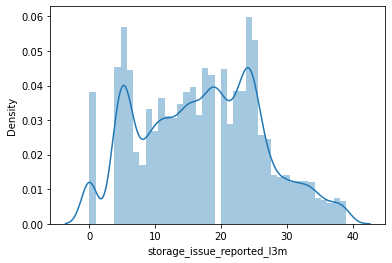

Description of temp_reg_mach
---------------------------------------------------------
count   25000.00
mean        0.30
std         0.46
min         0.00
25%         0.00
50%         0.00
75%         1.00
max         1.00
Name: temp_reg_mach, dtype: float64 

---------------------------------------------------------
Distplot of temp_reg_mach


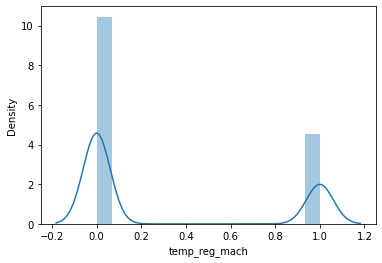

Description of wh_breakdown_l3m
---------------------------------------------------------
count   25000.00
mean        3.48
std         1.69
min         0.00
25%         2.00
50%         3.00
75%         5.00
max         6.00
Name: wh_breakdown_l3m, dtype: float64 

---------------------------------------------------------
Distplot of wh_breakdown_l3m


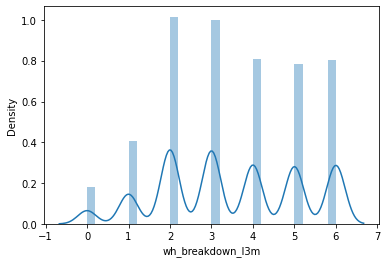

Description of govt_check_l3m
---------------------------------------------------------
count   25000.00
mean       18.81
std         8.63
min         1.00
25%        11.00
50%        21.00
75%        26.00
max        32.00
Name: govt_check_l3m, dtype: float64 

---------------------------------------------------------
Distplot of govt_check_l3m


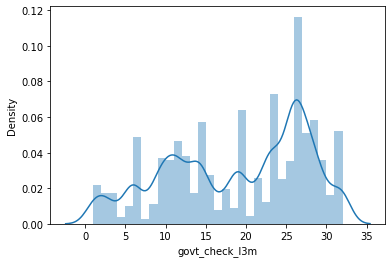

Description of product_wg_ton
---------------------------------------------------------
count   25000.00
mean    22102.63
std     11607.76
min      2065.00
25%     13059.00
50%     22101.00
75%     30103.00
max     55151.00
Name: product_wg_ton, dtype: float64 

---------------------------------------------------------
Distplot of product_wg_ton


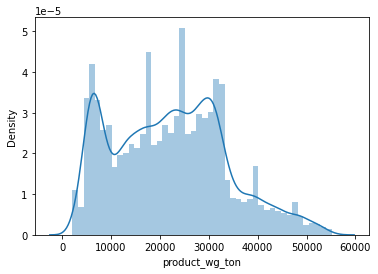

In [36]:
for x in numeric:
    uni_var_analysis(x,20)

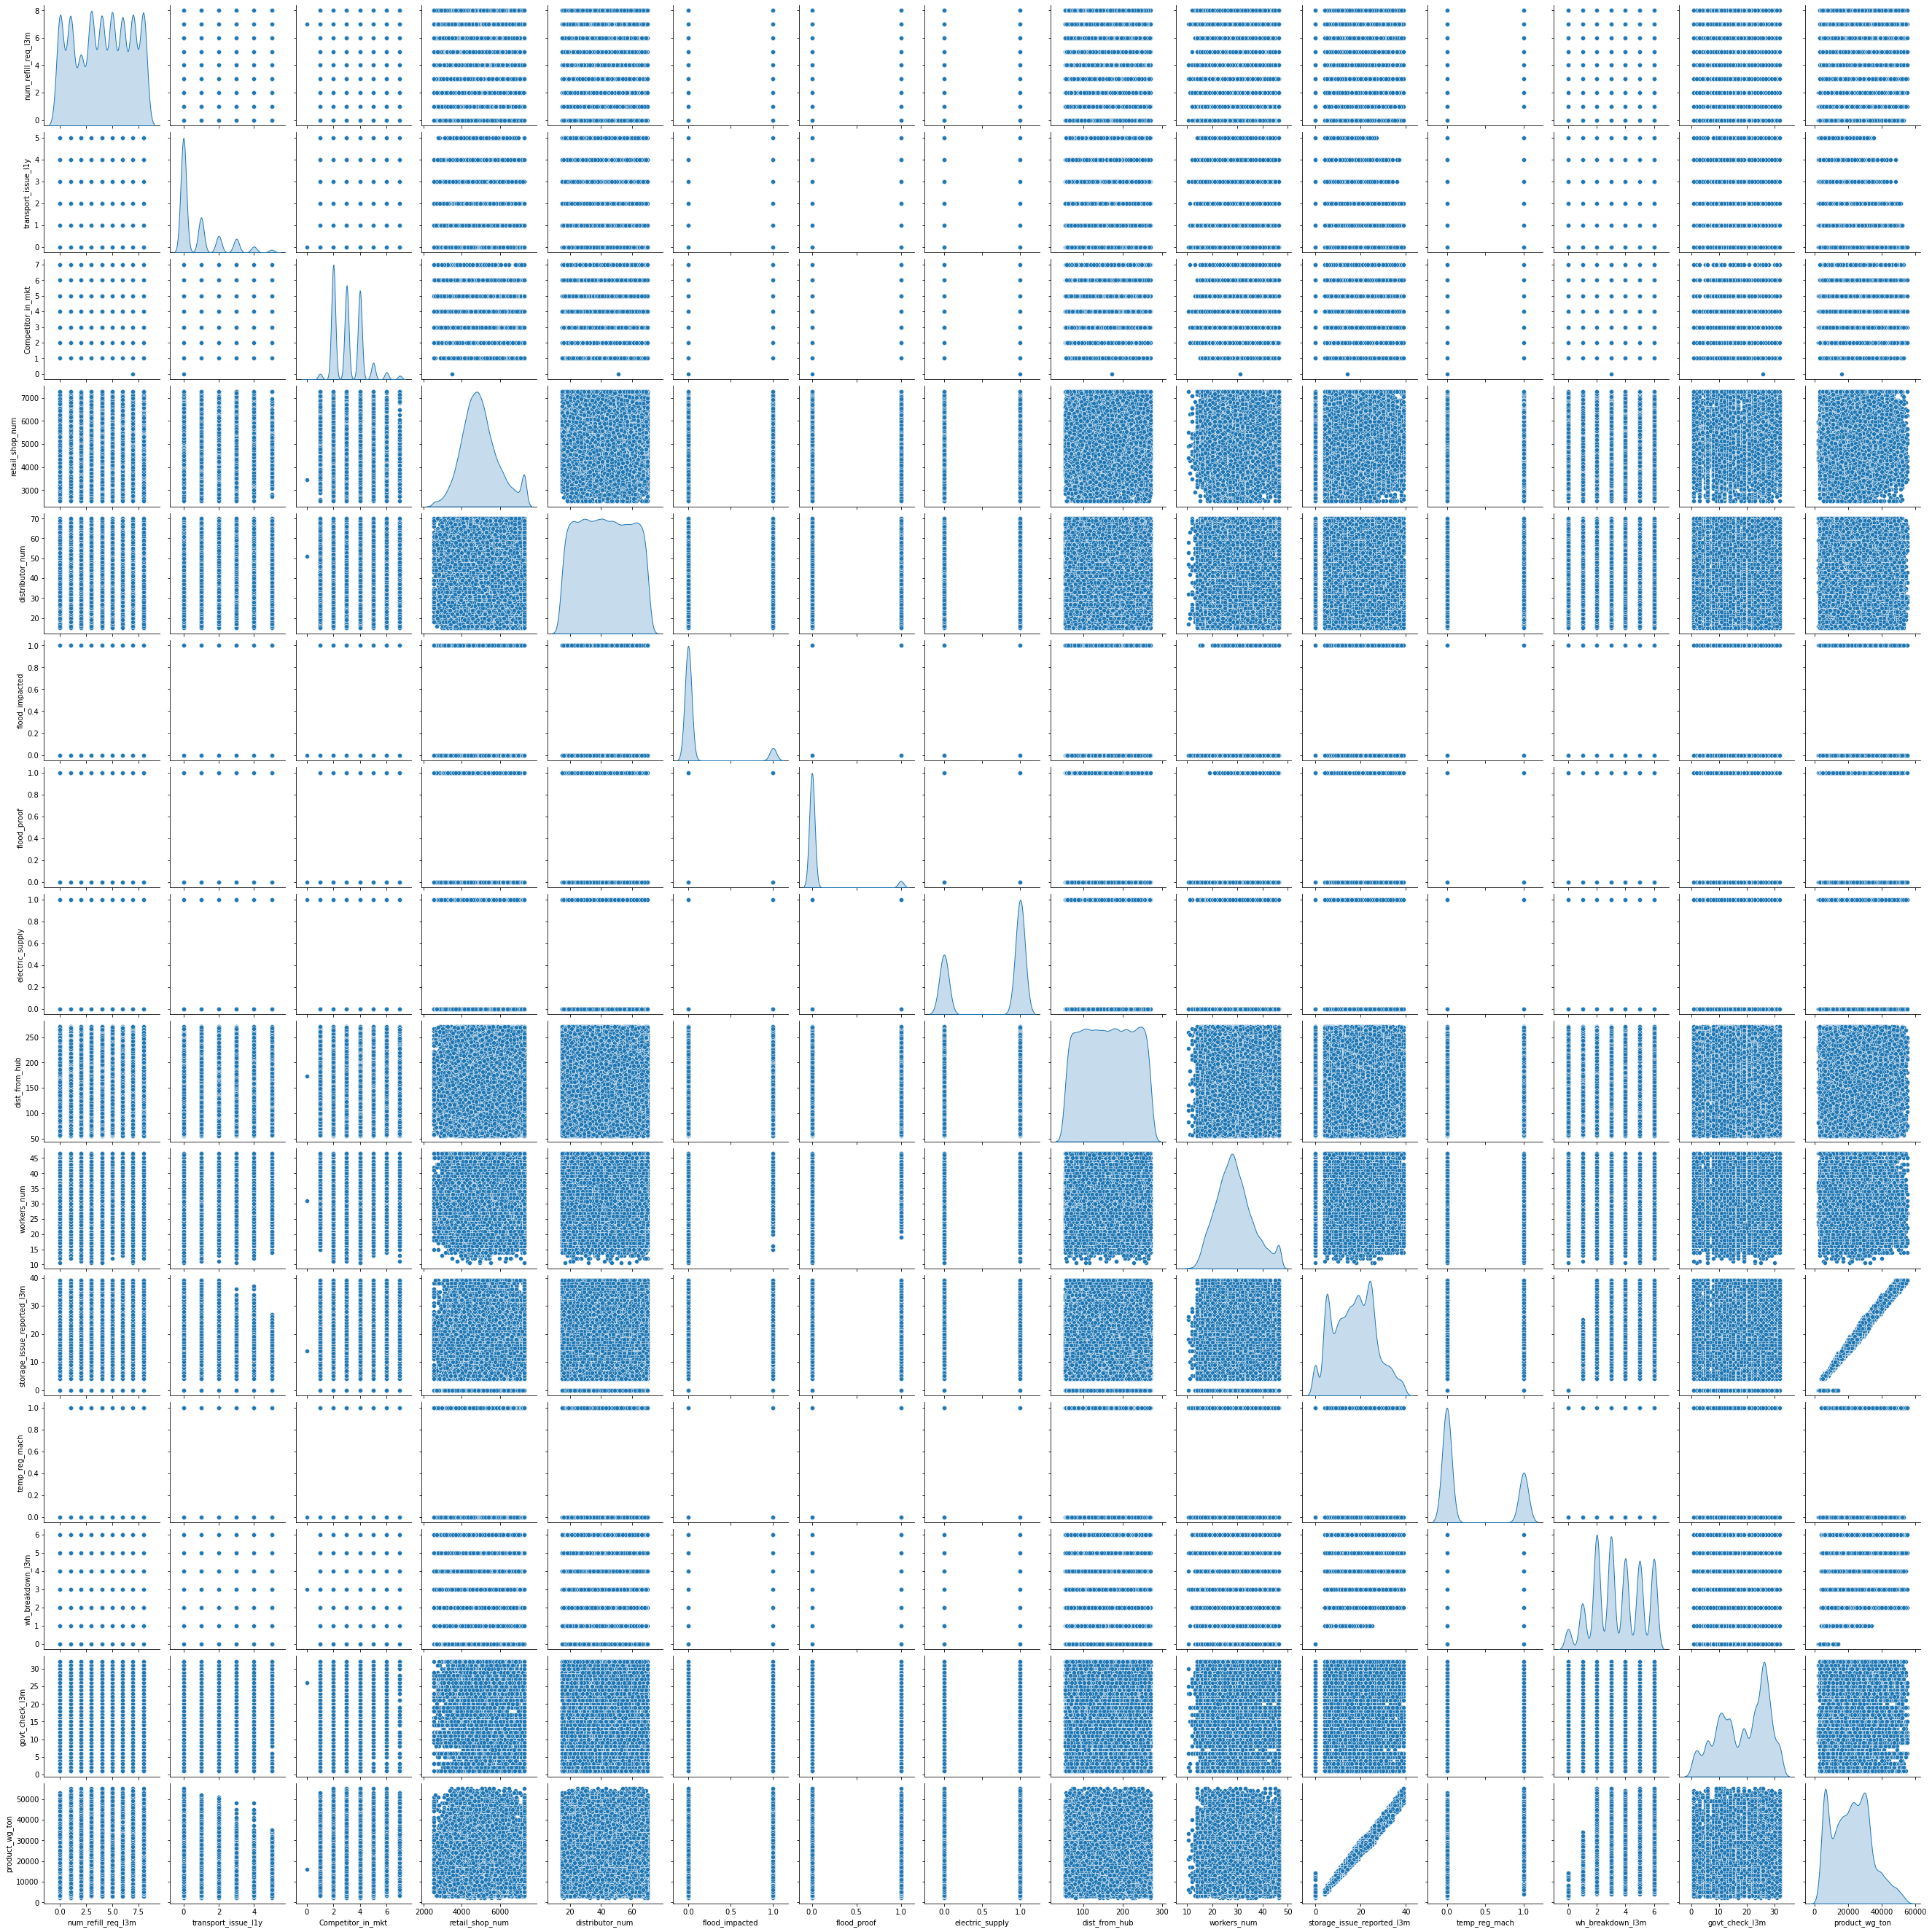

In [37]:
df_attr = (df1[numeric])
sns.pairplot(df_attr, diag_kind='kde')  
plt.show()

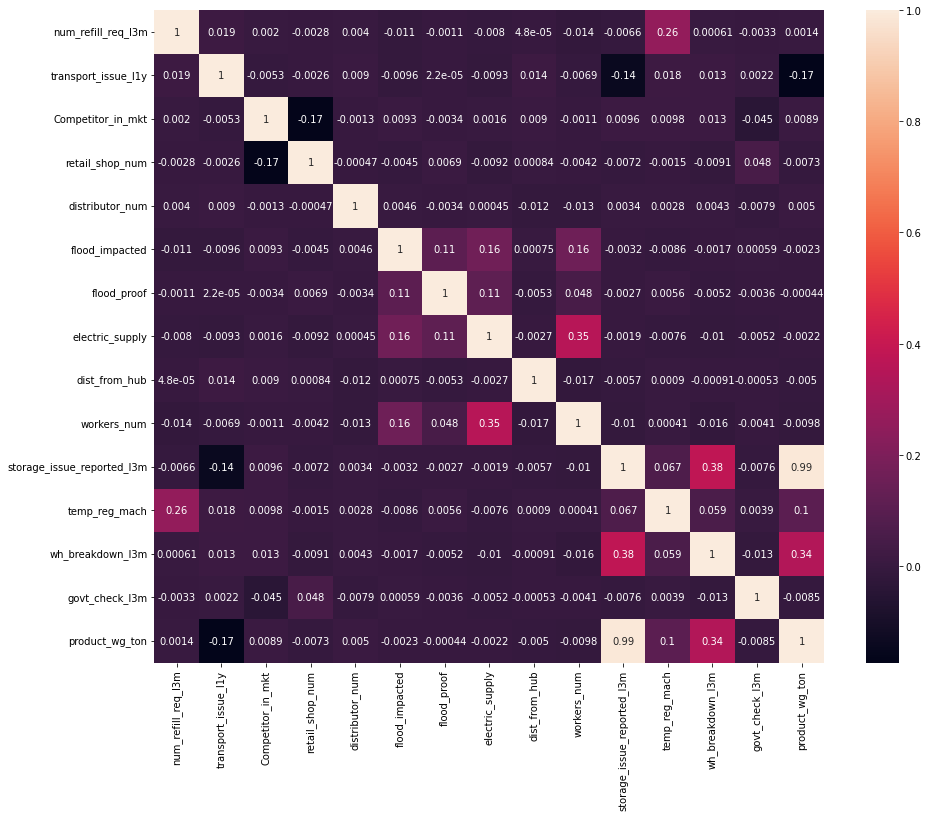

In [38]:
plt.figure(figsize=(15,12))
sns.heatmap(df1.corr(),annot=True)
plt.show()

In [39]:
df1.skew()

num_refill_req_l3m           -0.08
transport_issue_l1y           1.61
Competitor_in_mkt             0.80
retail_shop_num               0.44
distributor_num               0.02
flood_impacted                2.70
flood_proof                   3.92
electric_supply              -0.66
dist_from_hub                -0.01
workers_num                   0.43
storage_issue_reported_l3m    0.11
temp_reg_mach                 0.86
wh_breakdown_l3m             -0.07
govt_check_l3m               -0.36
product_wg_ton                0.33
dtype: float64

In [40]:
df1

,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,...,flood_proof,electric_supply,dist_from_hub,workers_num,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,Urban,Small,West,Zone 6,3.00,1.00,2.00,4651.00,Rented,24.00,...,1.00,1.00,91.00,29.00,13.00,0.00,A,5.00,15.00,17115.00
1,Rural,Large,North,Zone 5,0.00,0.00,4.00,6217.00,Company Owned,47.00,...,0.00,1.00,210.00,31.00,4.00,0.00,A,3.00,17.00,5074.00
2,Rural,Mid,South,Zone 2,1.00,0.00,4.00,4306.00,Company Owned,64.00,...,0.00,0.00,161.00,37.00,17.00,0.00,A,6.00,22.00,23137.00
3,Rural,Mid,North,Zone 3,7.00,4.00,2.00,6000.00,Rented,50.00,...,0.00,0.00,103.00,21.00,17.00,1.00,A+,3.00,27.00,22115.00
4,Rural,Large,North,Zone 5,3.00,1.00,2.00,4740.00,Company Owned,42.00,...,0.00,1.00,112.00,25.00,18.00,0.00,C,6.00,24.00,24071.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,Rural,Small,North,Zone 1,3.00,0.00,4.00,5390.00,Rented,19.00,...,0.00,1.00,142.00,34.00,22.00,1.00,A,2.00,30.00,32093.00
24996,Rural,Mid,West,Zone 2,6.00,0.00,4.00,4490.00,Company Owned,57.00,...,0.00,1.00,130.00,28.00,10.00,0.00,B,4.00,18.00,12114.00
24997,Urban,Large,South,Zone 5,7.00,0.00,2.00,5403.00,Rented,31.00,...,0.00,1.00,147.00,30.80,23.00,0.00,B+,5.00,25.00,27080.00
24998,Rural,Small,North,Zone 1,1.00,0.00,2.00,7280.50,Rented,25.00,...,0.00,1.00,60.00,25.00,18.00,0.00,A,6.00,30.00,25093.00


## Label Encoding for the Categorical Variables

In [41]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
for feature in df1.columns: 
    if df1[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        df1[feature]= label_encoder.fit_transform(df1[feature])
        print(df1[feature].unique())



feature: Location_type
[1 0]


feature: WH_capacity_size
[2 0 1]


feature: zone
[3 1 2 0]


feature: WH_regional_zone
[5 4 1 2 0 3]


feature: wh_owner_type
[1 0]


feature: approved_wh_govt_certificate
[0 1 4 2 3]


Description of Location_type
---------------------------------------------------------
count   25000.00
mean        0.08
std         0.27
min         0.00
25%         0.00
50%         0.00
75%         0.00
max         1.00
Name: Location_type, dtype: float64 

---------------------------------------------------------
Distplot of Location_type


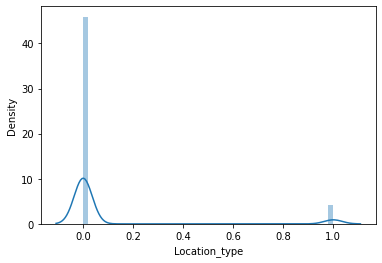

Description of WH_capacity_size
---------------------------------------------------------
count   25000.00
mean        0.79
std         0.74
min         0.00
25%         0.00
50%         1.00
75%         1.00
max         2.00
Name: WH_capacity_size, dtype: float64 

---------------------------------------------------------
Distplot of WH_capacity_size


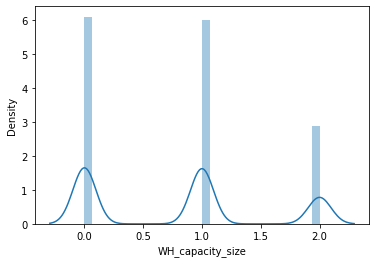

Description of zone
---------------------------------------------------------
count   25000.00
mean        1.87
std         0.88
min         0.00
25%         1.00
50%         2.00
75%         3.00
max         3.00
Name: zone, dtype: float64 

---------------------------------------------------------
Distplot of zone


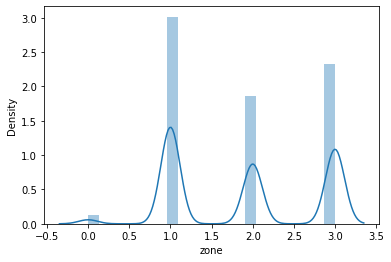

Description of WH_regional_zone
---------------------------------------------------------
count   25000.00
mean        3.25
std         1.67
min         0.00
25%         2.00
50%         4.00
75%         5.00
max         5.00
Name: WH_regional_zone, dtype: float64 

---------------------------------------------------------
Distplot of WH_regional_zone


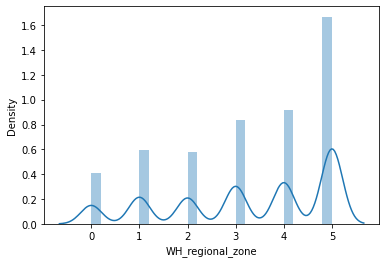

Description of wh_owner_type
---------------------------------------------------------
count   25000.00
mean        0.46
std         0.50
min         0.00
25%         0.00
50%         0.00
75%         1.00
max         1.00
Name: wh_owner_type, dtype: float64 

---------------------------------------------------------
Distplot of wh_owner_type


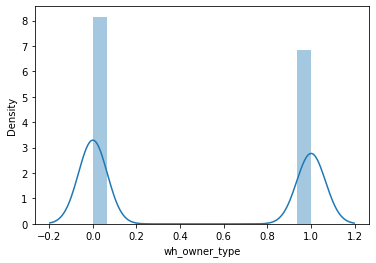

Description of approved_wh_govt_certificate
---------------------------------------------------------
count   25000.00
mean        2.17
std         1.45
min         0.00
25%         1.00
50%         2.00
75%         4.00
max         4.00
Name: approved_wh_govt_certificate, dtype: float64 

---------------------------------------------------------
Distplot of approved_wh_govt_certificate


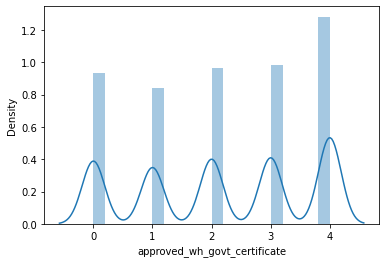

In [42]:
for x in categ:
    uni_var_analysis(x,20)

In [43]:
df1

,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,...,flood_proof,electric_supply,dist_from_hub,workers_num,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,1,2,3,5,3.00,1.00,2.00,4651.00,1,24.00,...,1.00,1.00,91.00,29.00,13.00,0.00,0,5.00,15.00,17115.00
1,0,0,1,4,0.00,0.00,4.00,6217.00,0,47.00,...,0.00,1.00,210.00,31.00,4.00,0.00,0,3.00,17.00,5074.00
2,0,1,2,1,1.00,0.00,4.00,4306.00,0,64.00,...,0.00,0.00,161.00,37.00,17.00,0.00,0,6.00,22.00,23137.00
3,0,1,1,2,7.00,4.00,2.00,6000.00,1,50.00,...,0.00,0.00,103.00,21.00,17.00,1.00,1,3.00,27.00,22115.00
4,0,0,1,4,3.00,1.00,2.00,4740.00,0,42.00,...,0.00,1.00,112.00,25.00,18.00,0.00,4,6.00,24.00,24071.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,0,2,1,0,3.00,0.00,4.00,5390.00,1,19.00,...,0.00,1.00,142.00,34.00,22.00,1.00,0,2.00,30.00,32093.00
24996,0,1,3,1,6.00,0.00,4.00,4490.00,0,57.00,...,0.00,1.00,130.00,28.00,10.00,0.00,2,4.00,18.00,12114.00
24997,1,0,2,4,7.00,0.00,2.00,5403.00,1,31.00,...,0.00,1.00,147.00,30.80,23.00,0.00,3,5.00,25.00,27080.00
24998,0,2,1,0,1.00,0.00,2.00,7280.50,1,25.00,...,0.00,1.00,60.00,25.00,18.00,0.00,0,6.00,30.00,25093.00


In [44]:
X = df1.drop('product_wg_ton', axis=1)
y = df1[['product_wg_ton']]

In [45]:
# splitting data into training and test set for independent attributes
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1)

# Model1: Linear Regression

In [46]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [47]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for Location_type is -109.00430606114132
The coefficient for WH_capacity_size is 11.128120809293875
The coefficient for zone is -3.8314078256313655
The coefficient for WH_regional_zone is -7.0222232835753955
The coefficient for num_refill_req_l3m is -2.5179083996127423
The coefficient for transport_issue_l1y is -310.6798423163092
The coefficient for Competitor_in_mkt is -8.001649806251871
The coefficient for retail_shop_num is -0.01424719652025266
The coefficient for wh_owner_type is 14.018823281343089
The coefficient for distributor_num is 1.1794545883088545
The coefficient for flood_impacted is 20.946341267744547
The coefficient for flood_proof is 54.6979951975392
The coefficient for electric_supply is 10.80469670504967
The coefficient for dist_from_hub is 0.2635033595973085
The coefficient for workers_num is -0.1651965163864737
The coefficient for storage_issue_reported_l3m is 1255.4020652578736
The coefficient for temp_reg_mach is 902.261707193937
The coefficient fo

In [48]:
intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is 1684.3273458754556


In [49]:
# R square on training data
regression_model.score(X_train, y_train)

0.9768486401787072

In [50]:
k=len(X_train.columns)

In [51]:
len(X_train.columns)

20

In [52]:
regression_model.score(X_test, y_test)

0.9779246658409846

In [53]:
#RMSE on Training data
predicted_train=regression_model.fit(X_train, y_train).predict(X_train)
np.sqrt(metrics.mean_squared_error(y_train,predicted_train))

1771.8292877017973

In [54]:
#RMSE on Testing data
predicted_test=regression_model.fit(X_train, y_train).predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test,predicted_test))

1711.5772610026902

In [55]:
from sklearn import metrics

y_pred = regression_model.predict(X_train)
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_train, y_pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_train, y_pred))
print('Root Mean Squared Error (RMSE):', metrics.mean_squared_error(y_train, y_pred, squared=False))
print('Mean Absolute Percentage Error (MAPE):', metrics.mean_absolute_percentage_error(y_train, y_pred))
print('R^2:', metrics.r2_score(y_train, y_pred))
r2=metrics.r2_score(y_train, y_pred)
adj_r2 = (1 - ((1 - r2) * (len(X) - 1) / (len(X) - k - 1)))
print('Adj R^2:', adj_r2)

Mean Absolute Error (MAE): 1294.4932657882464
Mean Squared Error (MSE): 3139379.0247578584
Root Mean Squared Error (RMSE): 1771.8292877017973
Mean Absolute Percentage Error (MAPE): 0.09011731113672405
R^2: 0.9768486401787072
Adj R^2: 0.976830103520057


In [56]:
from sklearn import metrics

y_pred = regression_model.predict(X_test)
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error (RMSE):', metrics.mean_squared_error(y_test, y_pred, squared=False))
print('Mean Absolute Percentage Error (MAPE):', metrics.mean_absolute_percentage_error(y_test, y_pred))
print('R^2:', metrics.r2_score(y_test, y_pred))
r2=metrics.r2_score(y_test, y_pred)
adj_r2 = 1 - ((1 - r2) * (len(X) - 1) / (len(X) - k - 1))
print('Adj R^2:', adj_r2)

Mean Absolute Error (MAE): 1275.0381190320231
Mean Squared Error (MSE): 2929496.7203814713
Root Mean Squared Error (RMSE): 1711.5772610026902
Mean Absolute Percentage Error (MAPE): 0.08844699146178421
R^2: 0.9779246658409846
Adj R^2: 0.9779069907265613


# StatsModel Linear 

In [57]:
# concatenate X and y into a single dataframe
data_train = pd.concat([X_train, y_train], axis=1)
data_test=pd.concat([X_test,y_test],axis=1)
data_train.head()

,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,...,flood_proof,electric_supply,dist_from_hub,workers_num,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
4289,0,0,3,4,0.00,2.00,4.00,5031.00,1,43.00,...,0.00,1.00,127.00,32.00,20.00,0.00,2,5.00,14.00,23086.00
19621,0,2,3,0,6.00,2.00,3.00,7280.50,1,59.00,...,0.00,1.00,248.00,28.00,15.00,1.00,1,3.00,30.00,19108.00
14965,0,1,3,3,6.00,0.00,4.00,5625.00,1,39.00,...,0.00,1.00,63.00,28.80,31.00,0.00,2,2.00,11.00,38125.00
12321,0,2,2,5,6.00,1.00,3.00,4240.00,0,54.00,...,0.00,1.00,260.00,31.00,28.00,0.00,2,2.00,2.00,33123.00
6269,1,1,3,3,4.00,4.00,3.00,7280.50,0,23.00,...,0.00,1.00,144.00,36.00,23.00,0.00,3,6.00,26.00,26089.00


In [58]:
data_train.columns

Index(['Location_type', 'WH_capacity_size', 'zone', 'WH_regional_zone',
       'num_refill_req_l3m', 'transport_issue_l1y', 'Competitor_in_mkt',
       'retail_shop_num', 'wh_owner_type', 'distributor_num', 'flood_impacted',
       'flood_proof', 'electric_supply', 'dist_from_hub', 'workers_num',
       'storage_issue_reported_l3m', 'temp_reg_mach',
       'approved_wh_govt_certificate', 'wh_breakdown_l3m', 'govt_check_l3m',
       'product_wg_ton'],
      dtype='object')

In [59]:
expr= 'product_wg_ton ~ Location_type +WH_capacity_size + zone + WH_regional_zone + num_refill_req_l3m + transport_issue_l1y + Competitor_in_mkt + retail_shop_num + wh_owner_type + distributor_num + flood_impacted + flood_proof + electric_supply + dist_from_hub + workers_num + storage_issue_reported_l3m + temp_reg_mach + approved_wh_govt_certificate + wh_breakdown_l3m + govt_check_l3m'

In [60]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula= expr, data = data_train).fit()
lm1.params

Intercept                      1684.33
Location_type                  -109.00
WH_capacity_size                 11.13
zone                             -3.83
WH_regional_zone                 -7.02
num_refill_req_l3m               -2.52
transport_issue_l1y            -310.68
Competitor_in_mkt                -8.00
retail_shop_num                  -0.01
wh_owner_type                    14.02
distributor_num                   1.18
flood_impacted                   20.95
flood_proof                      54.70
electric_supply                  10.80
dist_from_hub                     0.26
workers_num                      -0.17
storage_issue_reported_l3m     1255.40
temp_reg_mach                   902.26
approved_wh_govt_certificate   -105.06
wh_breakdown_l3m               -244.94
govt_check_l3m                   -0.23
dtype: float64

In [61]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [62]:
vif = [variance_inflation_factor(X.values, ix) for ix in range(X.shape[1])] 

In [63]:
i=0
for column in X.columns:
    if i < 11:
        print (column ,"--->",  vif[i])
        i = i+1

Location_type ---> 1.0973445203552459
WH_capacity_size ---> 2.8108329811221857
zone ---> 5.538050924233202
WH_regional_zone ---> 6.038444709730886
num_refill_req_l3m ---> 3.6500741554963376
transport_issue_l1y ---> 1.4484223262164364
Competitor_in_mkt ---> 8.2387631139269
retail_shop_num ---> 20.570291726593563
wh_owner_type ---> 1.9339293443243404
distributor_num ---> 7.438537592906299
flood_impacted ---> 1.167041788669339


In [64]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:         product_wg_ton   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                 3.688e+04
Date:                Sun, 09 Oct 2022   Prob (F-statistic):               0.00
Time:                        16:33:32   Log-Likelihood:            -1.5573e+05
No. Observations:               17500   AIC:                         3.115e+05
Df Residuals:                   17479   BIC:                         3.117e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

# Model 2: Decision Tree Regression

In [65]:
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)

DecisionTreeRegressor()

In [66]:
dt_model.score(X_train, y_train)

1.0

In [67]:
from sklearn import metrics

y_pred = dt_model.predict(X_train)
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_train, y_pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_train, y_pred))
print('Root Mean Squared Error (RMSE):', metrics.mean_squared_error(y_train, y_pred, squared=False))
print('Mean Absolute Percentage Error (MAPE):', metrics.mean_absolute_percentage_error(y_train, y_pred))
print('R^2:', metrics.r2_score(y_train, y_pred))
r2=metrics.r2_score(y_train, y_pred)
adj_r2 = 1 - ((1 - r2) * (len(X) - 1) / (len(X) - k - 1))
print('Adj R^2:', adj_r2)

Mean Absolute Error (MAE): 0.0
Mean Squared Error (MSE): 0.0
Root Mean Squared Error (RMSE): 0.0
Mean Absolute Percentage Error (MAPE): 0.0
R^2: 1.0
Adj R^2: 1.0


In [68]:
dt_model.score(X_test, y_test)

0.9877613009958309

In [69]:
from sklearn import metrics

y_pred = dt_model.predict(X_test)
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error (RMSE):', metrics.mean_squared_error(y_test, y_pred, squared=False))
print('Mean Absolute Percentage Error (MAPE):', metrics.mean_absolute_percentage_error(y_test, y_pred))
print('R^2:', metrics.r2_score(y_test, y_pred))
r2=metrics.r2_score(y_test, y_pred)
adj_r2 = 1 - ((1 - r2) * (len(X) - 1) / (len(X) - k - 1))
print('Adj R^2:', adj_r2)

Mean Absolute Error (MAE): 855.2006666666666
Mean Squared Error (MSE): 1624130.7305333333
Root Mean Squared Error (RMSE): 1274.4138772523365
Mean Absolute Percentage Error (MAPE): 0.05479134532738358
R^2: 0.9877613009958309
Adj R^2: 0.9877515018053076


# Model 3: Random Forest Regression

In [70]:
rf_model = RandomForestRegressor(n_estimators = 100, random_state = 0)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [71]:
rf_model.score(X_train, y_train)

0.9990249495242488

In [72]:
from sklearn import metrics

y_pred = rf_model.predict(X_train)
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_train, y_pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_train, y_pred))
print('Root Mean Squared Error (RMSE):', metrics.mean_squared_error(y_train, y_pred, squared=False))
print('Mean Absolute Percentage Error (MAPE):', metrics.mean_absolute_percentage_error(y_train, y_pred))
print('R^2:', metrics.r2_score(y_train, y_pred))
r2=metrics.r2_score(y_train, y_pred)
adj_r2 = 1 - ((1 - r2) * (len(X) - 1) / (len(X) - k - 1))
print('Adj R^2:', adj_r2)

Mean Absolute Error (MAE): 266.03101428571426
Mean Squared Error (MSE): 132219.14545330856
Root Mean Squared Error (RMSE): 363.61950642575346
Mean Absolute Percentage Error (MAPE): 0.017123237632071565
R^2: 0.9990249495242488
Adj R^2: 0.9990241688280834


In [73]:
rf_model.score(X_test, y_test)

0.9933359109743045

In [74]:
from sklearn import metrics

y_pred = rf_model.predict(X_test)
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error (RMSE):', metrics.mean_squared_error(y_test, y_pred, squared=False))
print('Mean Absolute Percentage Error (MAPE):', metrics.mean_absolute_percentage_error(y_test, y_pred))
print('R^2:', metrics.r2_score(y_test, y_pred))
r2=metrics.r2_score(y_test, y_pred)
adj_r2 = 1 - ((1 - r2) * (len(X) - 1) / (len(X) - k - 1))
print('Adj R^2:', adj_r2)

Mean Absolute Error (MAE): 704.1833
Mean Squared Error (MSE): 884354.7646653465
Root Mean Squared Error (RMSE): 940.4013848699642
Mean Absolute Percentage Error (MAPE): 0.04566724102422662
R^2: 0.9933359109743045
Adj R^2: 0.9933305752210512


# Model 4: Bagging Regressor

In [75]:
from sklearn.ensemble import BaggingRegressor

bgrg = BaggingRegressor(n_estimators=50,random_state=1,n_jobs=-1)

bgrg = bgrg.fit(X_train, y_train)

In [76]:
bgrg.score(X_train, y_train)

0.9989801548375216

In [77]:
from sklearn import metrics

y_pred = bgrg.predict(X_train)
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_train, y_pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_train, y_pred))
print('Root Mean Squared Error (RMSE):', metrics.mean_squared_error(y_train, y_pred, squared=False))
print('Mean Absolute Percentage Error (MAPE):', metrics.mean_absolute_percentage_error(y_train, y_pred))
print('R^2:', metrics.r2_score(y_train, y_pred))
r2=metrics.r2_score(y_train, y_pred)
adj_r2 = 1 - ((1 - r2) * (len(X) - 1) / (len(X) - k - 1))
print('Adj R^2:', adj_r2)

Mean Absolute Error (MAE): 269.3208365714287
Mean Squared Error (MSE): 138293.41068082285
Root Mean Squared Error (RMSE): 371.8782202291805
Mean Absolute Percentage Error (MAPE): 0.017338525906530823
R^2: 0.9989801548375216
Adj R^2: 0.9989793382754795


In [78]:
bgrg.score(X_test, y_test)

0.9932615301213645

In [79]:
from sklearn import metrics

y_pred = bgrg.predict(X_test)
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error (RMSE):', metrics.mean_squared_error(y_test, y_pred, squared=False))
print('Mean Absolute Percentage Error (MAPE):', metrics.mean_absolute_percentage_error(y_test, y_pred))
print('R^2:', metrics.r2_score(y_test, y_pred))
r2=metrics.r2_score(y_test, y_pred)
adj_r2 = 1 - ((1 - r2) * (len(X) - 1) / (len(X) - k - 1))
print('Adj R^2:', adj_r2)

Mean Absolute Error (MAE): 707.7308266666665
Mean Squared Error (MSE): 894225.4403786667
Root Mean Squared Error (RMSE): 945.6349403330372
Mean Absolute Percentage Error (MAPE): 0.04597357056789496
R^2: 0.9932615301213645
Adj R^2: 0.9932561348134029


# GridSearchCV on Random Forest Regression

In [80]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [7, 8],
    'max_features': [11, 12, 13],
    'min_samples_leaf': [20, 25],
    'min_samples_split': [60, 75],
    'n_estimators': [101, 301]
}

rfcl = RandomForestRegressor()

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 3,n_jobs=-1)

In [81]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [7, 8], 'max_features': [11, 12, 13],
                         'min_samples_leaf': [20, 25],
                         'min_samples_split': [60, 75],
                         'n_estimators': [101, 301]})

In [82]:
best_grid=grid_search.best_params_

In [83]:
param_grid_main = {
    'max_depth': [8],
    'max_features': [13],
    'min_samples_leaf': [20],
    'min_samples_split': [60],
    'n_estimators': [301]
}

In [84]:
grid_search_main = GridSearchCV(estimator = rfcl, param_grid=param_grid_main, cv = 3, n_jobs=-1)

In [85]:
grid_search_main.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [8], 'max_features': [13],
                         'min_samples_leaf': [20], 'min_samples_split': [60],
                         'n_estimators': [301]})

In [86]:
best_grid

{'max_depth': 8,
 'max_features': 13,
 'min_samples_leaf': 20,
 'min_samples_split': 60,
 'n_estimators': 301}

In [87]:
grid_search_main.score(X_train, y_train)

0.992830818566425

In [88]:
grid_search_main.score(X_test, y_test)

0.9928976217998001

In [89]:
from sklearn import metrics

y_pred = grid_search_main.predict(X_train)
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_train, y_pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_train, y_pred))
print('Root Mean Squared Error (RMSE):', metrics.mean_squared_error(y_train, y_pred, squared=False))
print('Mean Absolute Percentage Error (MAPE):', metrics.mean_absolute_percentage_error(y_train, y_pred))
print('R^2:', metrics.r2_score(y_train, y_pred))
r2=metrics.r2_score(y_train, y_pred)
adj_r2 = 1 - ((1 - r2) * (len(X) - 1) / (len(X) - k - 1))
print('Adj R^2:', adj_r2)

Mean Absolute Error (MAE): 730.8288480303748
Mean Squared Error (MSE): 972157.9203545962
Root Mean Squared Error (RMSE): 985.9806896458957
Mean Absolute Percentage Error (MAPE): 0.04662305804204671
R^2: 0.992830818566425
Adj R^2: 0.9928250783995379


In [90]:
from sklearn import metrics

y_pred = grid_search_main.predict(X_test)
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error (RMSE):', metrics.mean_squared_error(y_test, y_pred, squared=False))
print('Mean Absolute Percentage Error (MAPE):', metrics.mean_absolute_percentage_error(y_test, y_pred))
print('R^2:', metrics.r2_score(y_test, y_pred))
r2=metrics.r2_score(y_test, y_pred)
adj_r2 = 1 - ((1 - r2) * (len(X) - 1) / (len(X) - k - 1))
print('Adj R^2:', adj_r2)

Mean Absolute Error (MAE): 735.6256259958103
Mean Squared Error (MSE): 942517.7211144079
Root Mean Squared Error (RMSE): 970.8335187427389
Mean Absolute Percentage Error (MAPE): 0.04654970855448959
R^2: 0.9928976217998001
Adj R^2: 0.9928919351204293


In [91]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [92]:
X = StandardScaler()
scaled_bank_df = X.fit_transform(df1)
scaled_bank_df

array([[ 3.35214954,  1.63254736,  1.27697274, ...,  0.89804124,
        -0.44163432, -0.42968969],
       [-0.29831605, -1.05627825, -0.98676195, ..., -0.28517998,
        -0.20994393, -1.46703418],
       [-0.29831605,  0.28813455,  0.14510539, ...,  1.48965185,
         0.36928205,  0.08911178],
       ...,
       [ 3.35214954, -1.05627825,  0.14510539, ...,  0.89804124,
         0.71681763,  0.42880528],
       [-0.29831605,  1.63254736, -0.98676195, ...,  1.48965185,
         1.29604361,  0.25762319],
       [-0.29831605,  0.28813455,  1.27697274, ..., -0.87679059,
        -0.9050151 , -1.4684126 ]])

In [93]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [94]:
wardlink = linkage(scaled_bank_df, method = 'ward')

In [95]:
from scipy.cluster.hierarchy import fcluster

In [96]:
clusters = fcluster(wardlink, 3, criterion='maxclust')
clusters

array([1, 3, 3, ..., 2, 3, 1], dtype=int32)

In [97]:
df1['clusters']=clusters

In [98]:
df1.to_excel(r'dftocsv1.xlsx', encoding='utf-8', header='true',index='false')